# Process, analyze, and summarize data with Spark and PySpark

## Project Description

Did you know that a billion records are processed daily in PySpark by companies worldwide? As big data is on the rise, you’ll need tools like PySpark to process massive amounts of data.

This guided project was designed to introduce data analysts and data science beginners to data analysis in PySpark. This 2-hour project course teaches you how to create a PySpark environment, explore and clean large data, aggregate and summarize data, and visualize data using real-life examples. By the end of this guided project, you’ll create a Jupyter Notebook that processes, analyzes, and summarizes data using PySpark. By working on hands-on tasks, you will gain a solid knowledge of data aggregation and summarization with PySpark, helping you acquire job-ready skills. 

You don’t need any experience in PySpark, but knowledge of Python is essential to succeeding in this project.

## Project Overview
This project demonstrates how to process and analyze large datasets using PySpark, focusing on employees data. Tasks include data loading, cleaning, exploration, and aggregation, culminating in insights on employee salaries and demographics.

### About the Dataset
**employees.csv**: Contains employee details like employee numbers, names, birth dates, hire dates, etc.

**updated_salaries.csv**: Contains salary details for each employee, including salary amounts and dates.

# Task One: Set up and overview of the project
In this task, you will get an overview of the project and set up the PySpark environment.

In [1]:
## Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col, avg, max, min, countDistinct, sum, round

In [2]:
## Set up PySpark environment
from pyspark.sql import SparkSession

In [3]:
## Initialize the SparkSession
spark = SparkSession.builder.appName("Spark Data Exploration").getOrCreate()

## Verify that SparkSession is created
spark

# Task Two: Load the data
In this task, you will load the employees.csv and updated_salaries.csv data.

In [4]:
## Load the employees.csv dataset
try:
    emp_df = spark.read.csv('employees.csv', header=True, inferSchema=True)
    print("Employee data loaded successfully!")
except Exception as e:
    print("Error loading employee data:", e)

Employee data loaded successfully!


In [5]:
## Load the updated_salaries.csv dataset
sal_df = spark.read.format('csv') \
    .option('header', 'true') \
    .option('inferSchema', 'true') \
    .load('updated_salaries.csv')

In [6]:
## Show the first few rows of the employees data
emp_df.show(5)

+------+----------+----------+---------+------+----------+
|emp_no|birth_date|first_name|last_name|gender| hire_date|
+------+----------+----------+---------+------+----------+
| 10001|1953-09-02|    Georgi|  Facello|     M|1986-06-26|
| 10002|1964-06-02|   Bezalel|   Simmel|     F|1985-11-21|
| 10003|1959-12-03|     Parto|  Bamford|     M|1986-08-28|
| 10004|1954-05-01| Chirstian|  Koblick|     M|1986-12-01|
| 10005|1955-01-21|   Kyoichi| Maliniak|     M|1989-09-12|
+------+----------+----------+---------+------+----------+
only showing top 5 rows



In [7]:
## Show the first few rows of the salaries data
sal_df.show(5)

+------+------+-------+----------+----------+
|emp_no|salary|dept_no| from_date|   to_date|
+------+------+-------+----------+----------+
| 10017| 71380|   d001|1993-08-03|1994-08-03|
| 10017| 75538|   d001|1994-08-03|1995-08-03|
| 10017| 79510|   d001|1995-08-03|1996-08-02|
| 10017| 82163|   d001|1996-08-02|1997-08-02|
| 10017| 86157|   d001|1997-08-02|1998-08-02|
+------+------+-------+----------+----------+
only showing top 5 rows



In [8]:
## Print the schema for employees data
emp_df.printSchema()

root
 |-- emp_no: integer (nullable = true)
 |-- birth_date: date (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- hire_date: date (nullable = true)



In [9]:
## Print the schema for salary data
sal_df.printSchema()

root
 |-- emp_no: integer (nullable = true)
 |-- salary: integer (nullable = true)
 |-- dept_no: string (nullable = true)
 |-- from_date: date (nullable = true)
 |-- to_date: date (nullable = true)



# Task Three: Clean and process the data
In this task, you will perform quick data cleaning by converting variables to proper data types.

In [10]:
from pyspark.sql.types import StringType

## Cast the 'emp_no' column in the employees data to a string
# emp_df = emp_df.withColumn("emp_no", emp_df["emp_no"].cast(StringType()))
emp_df = emp_df.withColumn("emp_no", emp_df["emp_no"].cast("string"))

## Print the updated schema
emp_df.printSchema()

root
 |-- emp_no: string (nullable = true)
 |-- birth_date: date (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- hire_date: date (nullable = true)



In [11]:
## Chain transformations to cast 'emp_no' to string and 'to_date' & 'from_date' to date
sal_df = sal_df.withColumn("emp_no", sal_df["emp_no"].cast("string")) \
              .withColumn("to_date", sal_df["to_date"].cast("date")) \
              .withColumn("from_date", sal_df["from_date"].cast("date"))

## Show the updated schema
sal_df.printSchema()

root
 |-- emp_no: string (nullable = true)
 |-- salary: integer (nullable = true)
 |-- dept_no: string (nullable = true)
 |-- from_date: date (nullable = true)
 |-- to_date: date (nullable = true)



# Task Four: Explore the data
In this task, you will explore the salaries data by computing summary statistics and visualizing the salary column.

In [14]:
## Create a sum of missing values per column in the salary data
sal_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in sal_df.columns]).show()

+------+------+-------+---------+-------+
|emp_no|salary|dept_no|from_date|to_date|
+------+------+-------+---------+-------+
|     0|     0|      0|        0|      0|
+------+------+-------+---------+-------+



In [15]:
## Create the summary statistics for the salary data
sal_df.describe().show()

+-------+------------------+------------------+-------+
|summary|            emp_no|            salary|dept_no|
+-------+------------------+------------------+-------+
|  count|           1048575|           1048575|1048575|
|   mean|61678.835847698065| 63865.59273680948|   NULL|
| stddev| 33649.23971333694|16950.036684461294|   NULL|
|    min|            100000|             38735|   d001|
|    max|             99999|            158220|   d009|
+-------+------------------+------------------+-------+



In [19]:
## Count total rows and unique employees in salary data
print(f"Total rows in salary data: {sal_df.count()}")
print(f"Unique employees in salary data: {sal_df.select(countDistinct("emp_no")).collect()[0][0]}")

Total rows in salary data: 1048575
Unique employees in salary data: 100412


<Axes: xlabel='salary', ylabel='Count'>

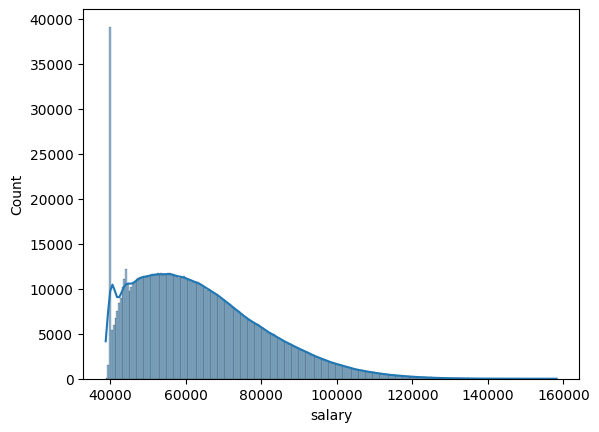

In [20]:
## Plot the salary distribution
sal_df_pd = sal_df.toPandas()
sns.histplot(sal_df_pd['salary'], kde=True)

# Practice Activity One: Explore the data

In [22]:
## Create a sum of missing values per column in the employees data
emp_df.select([sum(col(c).isNull().cast('int')).alias(c) for c in emp_df.columns]).show()

+------+----------+----------+---------+------+---------+
|emp_no|birth_date|first_name|last_name|gender|hire_date|
+------+----------+----------+---------+------+---------+
|     0|         0|         0|        0|     0|        0|
+------+----------+----------+---------+------+---------+



In [23]:
## Count the number of rows in the employees data
print(f"Total rows in employees data: {emp_df.count()}")

Total rows in employees data: 300024


In [24]:
## How many different first names can be found in the employees data?
print(f"Number of unique first names: {emp_df.select('first_name').distinct().count()}")

Number of unique first names: 1275


# Task Five: Aggregate and summarize the data
In this task, you will perform data aggregation and summarization using the salaries data.

In [29]:
from pyspark.sql import functions as F

## Group the data and calculate the average salary for each department
df_summary = sal_df.groupBy("dept_no").agg(avg("salary").alias("avg_salary"))
df_summary.show()

+-------+------------------+
|dept_no|        avg_salary|
+-------+------------------+
|   d003|55353.520326471196|
|   d001| 71901.72367418648|
|   d002| 70159.46621971931|
|   d004| 59539.78990774039|
|   d005| 59503.57499466995|
|   d006|57294.657039259815|
|   d007| 80776.62039654997|
|   d009| 58678.99039635241|
|   d008|59866.243526736595|
+-------+------------------+



In [33]:
## Get the average salary and number of employees in each department
dept_summary = sal_df.groupBy('dept_no').agg(
    round(avg('salary'), 2).alias('avg_salary'),
    max('salary').alias('max_salary'),
    countDistinct('emp_no').alias('employee_count')
)

dept_summary.show()

+-------+----------+----------+--------------+
|dept_no|avg_salary|max_salary|employee_count|
+-------+----------+----------+--------------+
|   d005|  59503.57|    144434|         29085|
|   d009|  58678.99|    144866|          5910|
|   d003|  55353.52|    123674|          6104|
|   d001|  71901.72|    143644|          6741|
|   d007|  80776.62|    158220|         17682|
|   d004|  59539.79|    132552|         25027|
|   d002|  70159.47|    134662|          5907|
|   d006|  57294.66|    122376|          6751|
|   d008|  59866.24|    124181|          7147|
+-------+----------+----------+--------------+



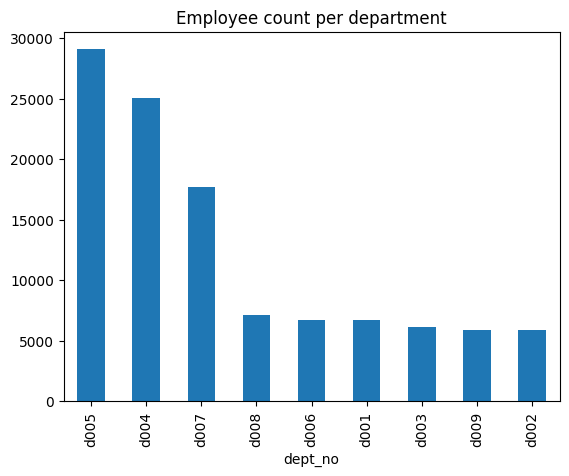

In [38]:
## Convert Spark data frame to Pandas for visualization
dept_summary_df = dept_summary.toPandas()

## Plot the data
dept_summary_df.sort_values(by='employee_count', ascending=False).plot(
    kind="bar", x="dept_no", y="employee_count", title="Employee count per department", legend=False)
plt.show()

In [41]:
## Retrieve a list of employee numbers and the average salary.
## Make sure that you return where the average salary is more than $120,000

## Group by employee number and calculate the average salary
emp_avg_salary = sal_df.groupBy("emp_no") \
    .agg(round(avg("salary"), 2).alias("average_salary")) \
    .filter(col("average_salary") > 120000) \
    .orderBy("emp_no") \
    .orderBy("average_salary", ascending=False)

## Show the result
emp_avg_salary.show()

+------+--------------+
|emp_no|average_salary|
+------+--------------+
|109334|     141835.33|
| 43624|     138492.94|
| 37558|     138215.86|
| 46439|     135747.73|
| 98169|     134374.81|
|102962|     134075.82|
| 44188|     132560.67|
| 66793|     132440.17|
| 51531|     132186.43|
| 47978|     131890.22|
| 80823|      131565.0|
| 39964|     131024.33|
| 53402|     129764.38|
| 56012|     129462.88|
| 91935|     129329.53|
| 89825|     129105.18|
| 41822|     128835.69|
| 36219|     128735.25|
| 18006|      128619.2|
| 18997|      128594.0|
+------+--------------+
only showing top 20 rows



# Task Six: Join the data sets
In this task, you will join the salaries and employees data using the employees number.

In [52]:
from pyspark.sql import functions as F

## Create an age column in the employees data
## Age when the employee was hired
emp_df = emp_df.withColumn('age', 
    F.floor(
        (F.year('hire_date') - F.year('birth_date')) + 
        ((F.month('hire_date') - F.month('birth_date')) / 12) + 
        ((F.dayofmonth('hire_date') - F.dayofmonth('birth_date')) / 365)
    )
)
emp_df.show(5)

+------+----------+----------+---------+------+----------+---+
|emp_no|birth_date|first_name|last_name|gender| hire_date|age|
+------+----------+----------+---------+------+----------+---+
| 10001|1953-09-02|    Georgi|  Facello|     M|1986-06-26| 32|
| 10002|1964-06-02|   Bezalel|   Simmel|     F|1985-11-21| 21|
| 10003|1959-12-03|     Parto|  Bamford|     M|1986-08-28| 26|
| 10004|1954-05-01| Chirstian|  Koblick|     M|1986-12-01| 32|
| 10005|1955-01-21|   Kyoichi| Maliniak|     M|1989-09-12| 34|
+------+----------+----------+---------+------+----------+---+
only showing top 5 rows



In [54]:
emp_df.show(5)
sal_df.show(5)

+------+----------+----------+---------+------+----------+---+
|emp_no|birth_date|first_name|last_name|gender| hire_date|age|
+------+----------+----------+---------+------+----------+---+
| 10001|1953-09-02|    Georgi|  Facello|     M|1986-06-26| 32|
| 10002|1964-06-02|   Bezalel|   Simmel|     F|1985-11-21| 21|
| 10003|1959-12-03|     Parto|  Bamford|     M|1986-08-28| 26|
| 10004|1954-05-01| Chirstian|  Koblick|     M|1986-12-01| 32|
| 10005|1955-01-21|   Kyoichi| Maliniak|     M|1989-09-12| 34|
+------+----------+----------+---------+------+----------+---+
only showing top 5 rows

+------+------+-------+----------+----------+
|emp_no|salary|dept_no| from_date|   to_date|
+------+------+-------+----------+----------+
| 10017| 71380|   d001|1993-08-03|1994-08-03|
| 10017| 75538|   d001|1994-08-03|1995-08-03|
| 10017| 79510|   d001|1995-08-03|1996-08-02|
| 10017| 82163|   d001|1996-08-02|1997-08-02|
| 10017| 86157|   d001|1997-08-02|1998-08-02|
+------+------+-------+----------+------

In [55]:
## Join salaries and employees data on 'emp_no'
emp_data = sal_df.join(emp_df, on="emp_no", how="left")
emp_data = emp_data.orderBy("emp_no")
emp_data.show(10)
emp_data.count()

+------+------+-------+----------+----------+----------+----------+---------+------+----------+---+
|emp_no|salary|dept_no| from_date|   to_date|birth_date|first_name|last_name|gender| hire_date|age|
+------+------+-------+----------+----------+----------+----------+---------+------+----------+---+
|100000| 41408|   d008|1991-07-02|1992-07-01|1956-01-11|  Hiroyasu|    Emden|     M|1991-07-02| 35|
|100000| 43119|   d008|1992-07-01|1993-07-01|1956-01-11|  Hiroyasu|    Emden|     M|1991-07-02| 35|
|100000| 46991|   d008|1993-07-01|1994-07-01|1956-01-11|  Hiroyasu|    Emden|     M|1991-07-02| 35|
|100000| 48751|   d008|1994-07-01|1995-07-01|1956-01-11|  Hiroyasu|    Emden|     M|1991-07-02| 35|
|100000| 52001|   d008|1995-07-01|1996-06-30|1956-01-11|  Hiroyasu|    Emden|     M|1991-07-02| 35|
|100000| 51503|   d008|1996-06-30|1997-06-30|1956-01-11|  Hiroyasu|    Emden|     M|1991-07-02| 35|
|100000| 52930|   d008|1997-06-30|1998-06-30|1956-01-11|  Hiroyasu|    Emden|     M|1991-07-02| 35|


1048575

In [58]:
## Retrieve a list of employee numbers and the average salary.
## Make sure that you return where the average salary is more than $120,000

## Group by employee number and calculate the average salary
emp_salary_summary = emp_data.groupBy("emp_no") \
    .agg(round(avg("salary"), 2).alias("average_salary")) \
    .filter(col("average_salary") > 120000)

## Join the aggregated result back with the original employee data to get first_name, last_name, hire_date
emp_salary_summary = emp_salary_summary.join(emp_df, on="emp_no", how="left") \
    .select("emp_no", "first_name", "last_name", "hire_date", "age", "average_salary") \
    .dropDuplicates(["emp_no"]) \
    .orderBy("average_salary", ascending=False)


emp_salary_summary.show()

+------+----------+--------------+----------+---+--------------+
|emp_no|first_name|     last_name| hire_date|age|average_salary|
+------+----------+--------------+----------+---+--------------+
|109334|   Tsutomu|     Alameldin|1985-02-15| 29|     141835.33|
| 43624|  Tokuyasu|         Pesch|1985-03-26| 31|     138492.94|
| 37558| Juichirou|   Thambidurai|1989-02-23| 25|     138215.86|
| 46439|    Ibibia|         Junet|1985-05-20| 32|     135747.73|
| 98169|   Bedrich|          Luft|1987-01-20| 34|     134374.81|
|102962| Chirstian|        Kobara|1985-09-24| 31|     134075.82|
| 44188|   Slavian|          Peac|1991-03-16| 30|     132560.67|
| 66793|   Lansing|        Kambil|1985-06-20| 21|     132440.17|
| 51531|     Clyde|Georgakopoulos|1987-05-17| 25|     132186.43|
| 47978|    Xiahua|      Whitcomb|1985-07-18| 29|     131890.22|
| 80823|   Willard|          Baca|1985-02-26| 22|      131565.0|
| 39964|  Almudena|        Dratva|1991-04-06| 27|     131024.33|
| 53402|    Houman|      

# Cumulative Activity: Analyze employees' retention

As a junior data analyst at a growing company, you are tasked with analyzing employee retention. Your aim is to find departments with the highest amount of employees that have worked longer than ten years. This will assist HR in enhancing employees' engagement and retention strategies. 

To complete this activity, you will use the employee dataset and create a data frame with the employee totals in each department for a period over 10 years (calculated by from_date and to_date).  Finally, you'll visualize how long-term employees are spread across departments via a bar chart.

In [78]:
from pyspark.sql import functions as F

## Calculate the years worked based on the difference between 'to_date' and 'from_date'
emp_data = emp_data.withColumn("years_worked", 
    F.year("to_date") - F.year("from_date")
)
emp_data.show(5)

## Group by emp_no and dept_no to sum the years worked
years_worked_summary = emp_data.groupBy("emp_no", "dept_no") \
    .agg(sum("years_worked").alias("total_years_worked")) \
    .orderBy("total_years_worked", ascending=False)
years_worked_summary.show(5)

+------+------+-------+----------+----------+----------+----------+---------+------+----------+---+------------+
|emp_no|salary|dept_no| from_date|   to_date|birth_date|first_name|last_name|gender| hire_date|age|years_worked|
+------+------+-------+----------+----------+----------+----------+---------+------+----------+---+------------+
|100000| 41408|   d008|1991-07-02|1992-07-01|1956-01-11|  Hiroyasu|    Emden|     M|1991-07-02| 35|           1|
|100000| 43119|   d008|1992-07-01|1993-07-01|1956-01-11|  Hiroyasu|    Emden|     M|1991-07-02| 35|           1|
|100000| 46991|   d008|1993-07-01|1994-07-01|1956-01-11|  Hiroyasu|    Emden|     M|1991-07-02| 35|           1|
|100000| 48751|   d008|1994-07-01|1995-07-01|1956-01-11|  Hiroyasu|    Emden|     M|1991-07-02| 35|           1|
|100000| 52001|   d008|1995-07-01|1996-06-30|1956-01-11|  Hiroyasu|    Emden|     M|1991-07-02| 35|           1|
+------+------+-------+----------+----------+----------+----------+---------+------+----------+-

In [77]:
emp_data.select("emp_no", "from_date", "to_date", "dept_no", "years_worked") \
    .where(col("emp_no") == 56941)\
    .orderBy("from_date", "dept_no", ascending=False).show()

+------+----------+----------+-------+------------+
|emp_no| from_date|   to_date|dept_no|years_worked|
+------+----------+----------+-------+------------+
| 56941|2001-08-12|9999-01-01|   d003|        7998|
| 56941|2001-08-12|9999-01-01|   d001|        7998|
| 56941|2000-08-12|2001-08-12|   d003|           1|
| 56941|2000-08-12|2001-08-12|   d001|           1|
| 56941|1999-08-13|2000-08-12|   d003|           1|
| 56941|1999-08-13|2000-08-12|   d001|           1|
| 56941|1998-08-13|1999-08-13|   d003|           1|
| 56941|1998-08-13|1999-08-13|   d001|           1|
| 56941|1997-08-13|1998-08-13|   d003|           1|
| 56941|1997-08-13|1998-08-13|   d001|           1|
| 56941|1996-08-13|1997-08-13|   d003|           1|
| 56941|1996-08-13|1997-08-13|   d001|           1|
| 56941|1995-08-14|1996-08-13|   d003|           1|
| 56941|1995-08-14|1996-08-13|   d001|           1|
| 56941|1994-08-14|1995-08-14|   d003|           1|
| 56941|1994-08-14|1995-08-14|   d001|           1|
| 56941|1993

In [79]:
## Filter employees who have worked more than 10 years
long_term_employees = years_worked_summary.filter(F.col("total_years_worked") > 10)

## Group by department and count distinct employees who worked more than 10 years
long_term_count = long_term_employees.groupBy("dept_no").agg(F.countDistinct("emp_no").alias("long_term_employees"))
long_term_count.show()

## Show the result


+-------+-------------------+
|dept_no|long_term_employees|
+-------+-------------------+
|   d005|              23863|
|   d009|               4822|
|   d003|               5048|
|   d001|               5583|
|   d007|              14537|
|   d004|              20580|
|   d002|               4828|
|   d006|               5549|
|   d008|               5886|
+-------+-------------------+



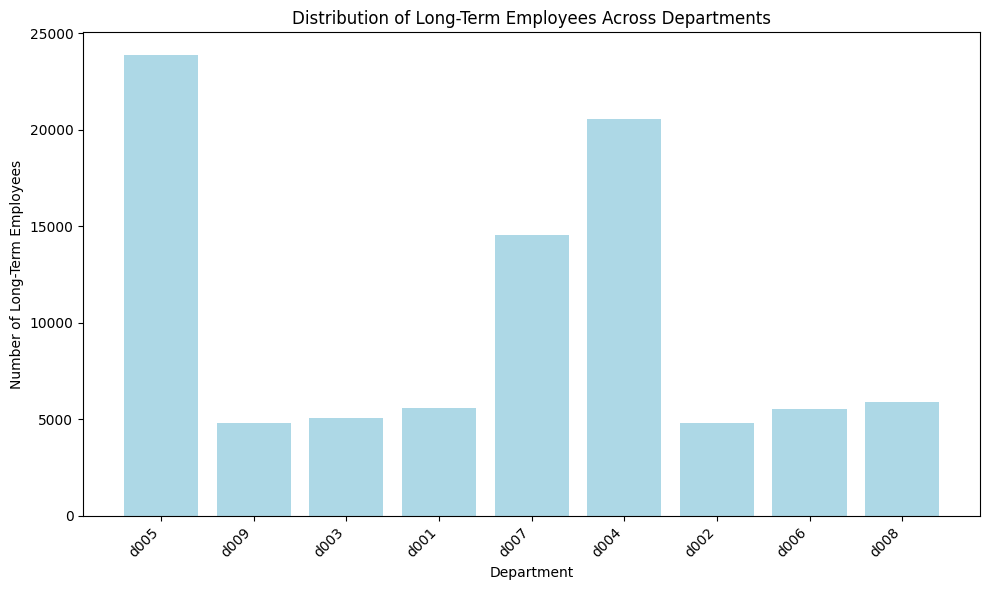

In [80]:
## Convert the Spark data frame to Pandas for visualization
long_term_count_pandas = long_term_count.toPandas()

## Create a bar chart to visualize the distribution of long-term employees across departments
plt.figure(figsize=(10, 6))
plt.bar(long_term_count_pandas['dept_no'], long_term_count_pandas['long_term_employees'], color='lightblue')
plt.title("Distribution of Long-Term Employees Across Departments")
plt.xlabel("Department")
plt.ylabel("Number of Long-Term Employees")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()S